In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv("resp_data.csv")
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [5]:
# check information about the dataset 
df.info

<bound method DataFrame.info of          Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0   6/16/2014

In [8]:
df.shape

(2240, 22)

In [9]:
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [6]:
 #check for columns 
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [7]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [11]:
#check for peccentage of null values
import pandas as pd

# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
null_percentage_df = pd.DataFrame({'Column': null_percentage.index, 'Null Percentage': null_percentage.values})

# Sort the DataFrame by Null Percentage in descending order
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)

# Display the DataFrame
print(null_percentage_df)


                 Column  Null Percentage
4                Income         1.071429
0                    Id         0.000000
12      MntFishProducts         0.000000
20             Response         0.000000
19    NumWebVisitsMonth         0.000000
18    NumStorePurchases         0.000000
17  NumCatalogPurchases         0.000000
16      NumWebPurchases         0.000000
15    NumDealsPurchases         0.000000
14         MntGoldProds         0.000000
13     MntSweetProducts         0.000000
11      MntMeatProducts         0.000000
1            Year_Birth         0.000000
10            MntFruits         0.000000
9              MntWines         0.000000
8               Recency         0.000000
7           Dt_Customer         0.000000
6              Teenhome         0.000000
5               Kidhome         0.000000
3        Marital_Status         0.000000
2             Education         0.000000
21             Complain         0.000000


In [13]:
# Drop rows with null values in the 'income' column
df = df.dropna(subset=['Income'])

# Display the cleaned DataFrame
print(df)


         Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0   6/16/2014        0       189        104  

In [14]:
df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [15]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [16]:
df.duplicated().sum()

0

In [17]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)



Categorical columns: Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')
Numerical columns: Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Complain'],
      dtype='object')


### PREPROCEESING


In [18]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [22]:
 def preprocess_inputs(df):
    df = df.copy()

    df = df.drop('Id', axis = 1)
    df['Income'] = df['Income'].fillna(df['Income'].mean())

    # Date encoding
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
    df['Month_Customer'] =df['Dt_Customer'].apply(lambda x: x.month)
    df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
    df= df.drop('Dt_Customer', axis=1)

    # One-hot encoding
    for column in ['Education', 'Marital_Status']:
        df = onehot_encode(df, column=column)
    

    # Split df into X and y
    y = df['Response']
    X = df.drop('Response', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    return X_train, X_test, y_train, y_test


In [25]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [26]:
X_train

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Year_Customer,Month_Customer,Day_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
684,-0.718566,-0.834702,-0.797517,-0.934104,-0.685073,-0.724874,0.220673,-0.426722,-0.010146,-0.174273,1.229987,-0.669554,0.327604,-0.587091,-0.551861,0.722955,-0.084515,-0.061976,1.254227,-1.403093,-0.311269,-0.151944,1.009718,-0.458070,-0.531863,-0.035933,-0.035933,-0.342688,-0.783546,-0.525874,1.684966,-0.188097,-0.0254
840,0.373830,-0.634789,1.068168,0.906805,-0.408566,-0.871530,-0.666915,-0.713425,-0.623036,-0.610548,-0.467398,-0.162732,-1.107746,-0.587091,-1.165436,-0.097311,-0.084515,1.394457,-0.448448,0.408706,-0.311269,-0.151944,-0.990375,-0.458070,1.880183,-0.035933,-0.035933,2.918105,-0.783546,-0.525874,-0.593484,-0.188097,-0.0254
1591,-0.130353,-0.979044,1.068168,-0.934104,0.766590,-0.877396,-0.617604,-0.683017,-0.659088,-0.610548,-0.693716,-0.162732,-0.748909,-0.916058,-0.858648,0.312822,-0.084515,1.394457,-1.583565,-1.403093,-0.311269,-0.151944,-0.990375,-0.458070,1.880183,-0.035933,-0.035933,2.918105,-0.783546,-0.525874,-0.593484,-0.188097,-0.0254
1448,0.205769,-0.374301,1.068168,0.906805,0.524646,0.196123,-0.568294,-0.344186,-0.478827,-0.440885,1.003669,2.371379,0.686442,1.057740,-0.551861,0.312822,-0.084515,-0.061976,-0.164669,1.654318,-0.311269,-0.151944,-0.990375,2.183071,-0.531863,-0.035933,-0.035933,2.918105,-0.783546,-0.525874,-0.593484,-0.188097,-0.0254
482,0.289799,0.873018,-0.797517,0.906805,-0.961580,0.606759,0.565846,-0.022731,1.648261,-0.659023,-0.071341,-0.669554,1.404117,0.070841,1.595650,-0.917576,-0.084515,1.394457,-0.164669,-1.516330,-0.311269,-0.151944,-0.990375,2.183071,-0.531863,-0.035933,-0.035933,-0.342688,1.276250,-0.525874,-0.593484,-0.188097,-0.0254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,-0.214383,-0.822154,1.068168,0.906805,-0.201185,-0.845132,-0.666915,-0.739489,-0.695141,-0.659023,-0.674856,-0.162732,-1.107746,-0.587091,-1.165436,-0.097311,-0.084515,1.394457,-0.448448,1.201368,-0.311269,-0.151944,-0.990375,-0.458070,1.880183,-0.035933,-0.035933,-0.342688,-0.783546,-0.525874,1.684966,-0.188097,-0.0254
912,1.970408,0.831190,-0.797517,-0.934104,-0.304875,0.759281,-0.371052,1.523728,0.440508,0.795228,-0.391959,-0.669554,-0.390071,2.373605,-0.245074,-1.327708,-0.084515,-0.061976,0.119110,-0.497193,-0.311269,-0.151944,1.009718,-0.458070,-0.531863,-0.035933,-0.035933,-0.342688,-0.783546,-0.525874,1.684966,-0.188097,-0.0254
1105,1.382195,-0.557520,-0.797517,-0.934104,0.006195,-0.323038,-0.617604,-0.548353,-0.641062,-0.610548,-0.655996,-0.162732,-0.031233,-0.258125,-0.245074,0.722955,-0.084515,-0.061976,0.119110,1.654318,-0.311269,-0.151944,-0.990375,-0.458070,1.880183,-0.035933,-0.035933,-0.342688,-0.783546,1.901597,-0.593484,-0.188097,-0.0254
236,-0.046322,-0.058653,1.068168,0.906805,-1.341777,-0.572352,-0.666915,-0.652609,-0.460800,-0.659023,-0.278800,0.344090,-0.031233,-0.587091,-0.858648,0.722955,-0.084515,1.394457,-1.583565,-1.289855,-0.311269,-0.151944,1.009718,-0.458070,-0.531863,-0.035933,-0.035933,-0.342688,1.276250,-0.525874,-0.593484,-0.188097,-0.0254


### MODEL TRAINING

In [28]:
def logistic_regression(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Logistic Regression Accuracy: {accuracy}")
    print(f"Logistic Regression AUC: {auc}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Logistic Regression Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

Logistic Regression Accuracy: 0.8571428571428571
Logistic Regression AUC: 0.8515789655529835
Confusion Matrix:
[[540  22]
 [ 73  30]]


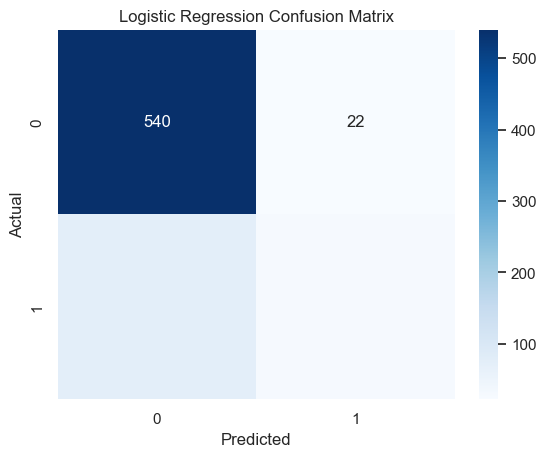

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       562
           1       0.58      0.29      0.39       103

    accuracy                           0.86       665
   macro avg       0.73      0.63      0.65       665
weighted avg       0.83      0.86      0.84       665



In [29]:
logistic_regression(X_train, y_train, X_test, y_test)

In [30]:
def random_forest(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Random Forest Accuracy: {accuracy}")
    print(f"Random Forest AUC: {auc}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Random Forest Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

Random Forest Accuracy: 0.8601503759398497
Random Forest AUC: 0.8604844003731471
Confusion Matrix:
[[555   7]
 [ 86  17]]


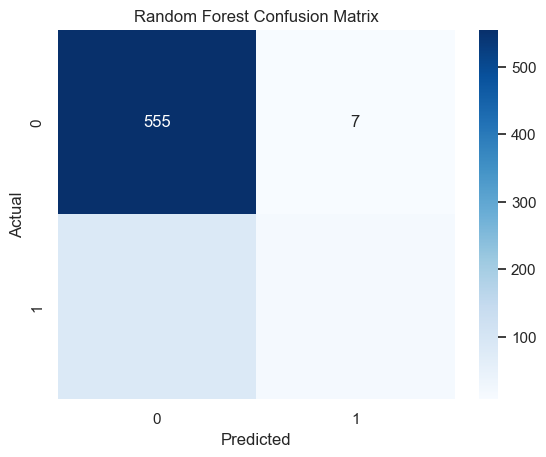

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       562
           1       0.71      0.17      0.27       103

    accuracy                           0.86       665
   macro avg       0.79      0.58      0.60       665
weighted avg       0.84      0.86      0.82       665



In [31]:
random_forest(X_train, y_train, X_test, y_test)

SVM Accuracy: 0.8571428571428571
SVM AUC: 0.8511643575303182
Confusion Matrix:
[[553   9]
 [ 86  17]]


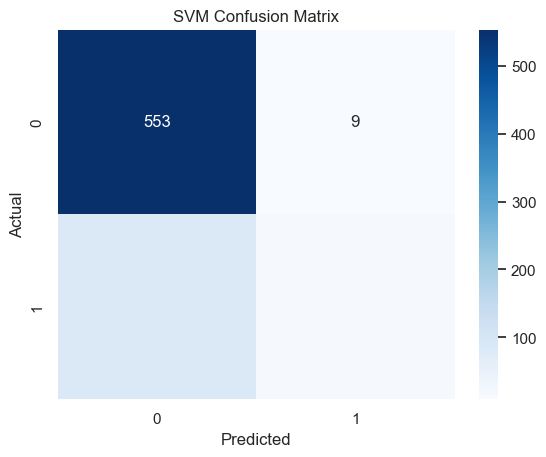

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       562
           1       0.65      0.17      0.26       103

    accuracy                           0.86       665
   macro avg       0.76      0.57      0.59       665
weighted avg       0.83      0.86      0.82       665



In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def svm_classifier(X_train, y_train, X_test, y_test):
    # Initialize Support Vector Classifier
    svm = SVC(probability=True, random_state=1)
    
    # Train the model
    svm.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = svm.predict(X_test)
    y_pred_prob = svm.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"SVM Accuracy: {accuracy}")
    print(f"SVM AUC: {auc}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('SVM Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

svm_classifier(X_train, y_train, X_test, y_test)

Gradient Boosting Accuracy: 0.869172932330827
Gradient Boosting AUC: 0.8837110873095394
Confusion Matrix:
[[544  18]
 [ 69  34]]


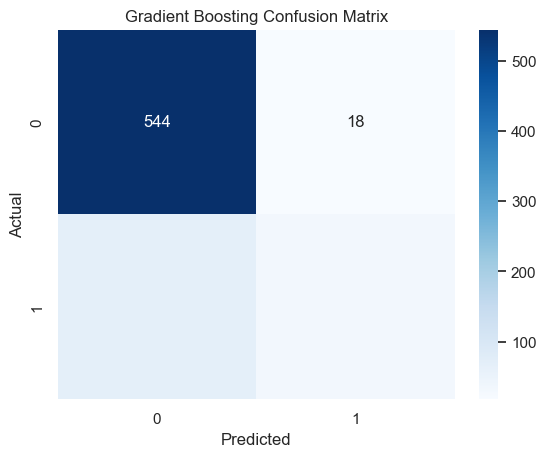

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       562
           1       0.65      0.33      0.44       103

    accuracy                           0.87       665
   macro avg       0.77      0.65      0.68       665
weighted avg       0.85      0.87      0.85       665



In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def gradient_boosting(X_train, y_train, X_test, y_test):
    # Initialize GradientBoostingClassifier
    gb = GradientBoostingClassifier(n_estimators=100, random_state=1)
    
    # Train the model
    gb.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = gb.predict(X_test)
    y_pred_prob = gb.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Gradient Boosting Accuracy: {accuracy}")
    print(f"Gradient Boosting AUC: {auc}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Gradient Boosting Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

gradient_boosting(X_train, y_train, X_test, y_test)

### SUMMARY OF MODEL PERFORMANCE

In [34]:
def summarize_model_performance(models, X_train, y_train, X_test, y_test):
    summary = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else "N/A"
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        summary.append({
            "Model": name,
            "Accuracy": accuracy,
            "AUC": auc,
            "Confusion Matrix": cm,
            "Classification Report": report
        })
    
    return pd.DataFrame(summary)

# Define your models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=1),
    "SVM": SVC(probability=True, random_state=1)
}

# Summarize performance
performance_summary = summarize_model_performance(models, X_train, y_train, X_test, y_test)
print(performance_summary)

                 Model  Accuracy       AUC       Confusion Matrix  \
0  Logistic Regression  0.857143  0.851579  [[540, 22], [73, 30]]   
1        Random Forest  0.860150  0.860484   [[555, 7], [86, 17]]   
2    Gradient Boosting  0.869173  0.883711  [[544, 18], [69, 34]]   
3                  SVM  0.857143  0.851164   [[553, 9], [86, 17]]   

                               Classification Report  
0  {'0': {'precision': 0.8809135399673735, 'recal...  
1  {'0': {'precision': 0.8658346333853354, 'recal...  
2  {'0': {'precision': 0.8874388254486134, 'recal...  
3  {'0': {'precision': 0.865414710485133, 'recall...  
